**Problem Statement:**

Travelling through flights has become an integral part of today’s lifestyle as more and
more people are opting for faster travelling options. The flight ticket prices increase or
decrease every now and then depending on various factors like timing of the flights,
destination, and duration of flights various occasions such as vacations or festive
season. Therefore, having some basic idea of the flight fares before planning the trip will
surely help many people save money and time.
The main goal is to predict the fares of the flights based on different factors available in
the provided dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Data_Train.csv")

# Data Exploration

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
data.shape

(10683, 11)

In [ ]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Data Cleaning

In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data["Route"]=data["Route"].fillna(data["Route"].mode().values[0])

In [ ]:
data["Total_Stops"]=data["Total_Stops"].fillna(data["Total_Stops"].mode().values[0])

In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data.duplicated().sum()

220

In [ ]:
data.drop_duplicates(inplace=True)

# Feature Engineering

In [ ]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
data['Date_of_Journey']
data['Month']=data['Date_of_Journey'].dt.month
data['Year']=data['Date_of_Journey'].dt.year
data['Day']=data['Date_of_Journey'].dt.day

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Year,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,2019,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,2019,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,2019,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,2019,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,2019,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10463 non-null  object        
 1   Date_of_Journey  10463 non-null  datetime64[ns]
 2   Source           10463 non-null  object        
 3   Destination      10463 non-null  object        
 4   Route            10463 non-null  object        
 5   Dep_Time         10463 non-null  object        
 6   Arrival_Time     10463 non-null  object        
 7   Duration         10463 non-null  object        
 8   Total_Stops      10463 non-null  object        
 9   Additional_Info  10463 non-null  object        
 10  Price            10463 non-null  int64         
 11  Month            10463 non-null  int64         
 12  Year             10463 non-null  int64         
 13  Day              10463 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object

In [ ]:
#The route column tells about the journey's path.
#Route column can be removed because 'Total_Stops' field has already captured this value and both are related.
#'Additional_Info' column can be dropped since more than 70% of them have no information.
data.drop(["Route", "Additional_Info","Date_of_Journey"], axis = 1, inplace = True)

In [ ]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month,Year,Day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,2019,24
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,2019,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,2019,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,2019,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,2019,3


In [ ]:
data['Total_Stops'] = data["Total_Stops"].str.replace('non-stop','0')
data['Total_Stops'] = data["Total_Stops"].str.replace('stops','')
data['Total_Stops'] = data["Total_Stops"].str.replace('stop','')
data['Total_Stops'] = data["Total_Stops"].str.replace(' ','')
data['Total_Stops'] = data["Total_Stops"].astype(int)

In [ ]:
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Airline       10463 non-null  object        
 1   Source        10463 non-null  object        
 2   Destination   10463 non-null  object        
 3   Dep_Time      10463 non-null  datetime64[ns]
 4   Arrival_Time  10463 non-null  datetime64[ns]
 5   Duration      10463 non-null  object        
 6   Total_Stops   10463 non-null  int64         
 7   Price         10463 non-null  int64         
 8   Month         10463 non-null  int64         
 9   Year          10463 non-null  int64         
 10  Day           10463 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 980.9+ KB


In [ ]:
data['Dep_hour']=data['Dep_Time'].dt.hour
data['Arrival_hour']=data['Arrival_Time'].dt.hour

In [ ]:
#Dropping dep_time and arrival_time columns as the duration columns is already present
data.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [ ]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Month,Year,Day,Dep_hour,Arrival_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,3,2019,24,22,1
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,2019,5,5,13
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,2019,6,9,4
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,2019,5,18,23
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,2019,3,16,21


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       10463 non-null  object
 1   Source        10463 non-null  object
 2   Destination   10463 non-null  object
 3   Duration      10463 non-null  object
 4   Total_Stops   10463 non-null  int64 
 5   Price         10463 non-null  int64 
 6   Month         10463 non-null  int64 
 7   Year          10463 non-null  int64 
 8   Day           10463 non-null  int64 
 9   Dep_hour      10463 non-null  int64 
 10  Arrival_hour  10463 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 980.9+ KB


In [ ]:
data['dur_hr']=data['Duration'].str.split('h').str[0]

In [ ]:
data['dur_hr']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: dur_hr, Length: 10463, dtype: object

In [ ]:
data['dur_hr'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [ ]:
data.drop(data[data['dur_hr'] == '5m'].index,inplace=True)

In [ ]:
data['dur_min']=data['Duration'].str.split(' ').str[1]

In [ ]:
data['dur_min']

0        50m
1        25m
2        NaN
3        25m
4        45m
        ... 
10678    30m
10679    35m
10680    NaN
10681    40m
10682    20m
Name: dur_min, Length: 10462, dtype: object

In [ ]:
data['dur_min']=data['dur_min'].str.replace('m','')

In [ ]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Month,Year,Day,Dep_hour,Arrival_hour,dur_hr,dur_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,3,2019,24,22,1,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,2019,5,5,13,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,2019,6,9,4,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,2019,5,18,23,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,2019,3,16,21,4,45


In [ ]:
data['dur_min']=data['dur_min'].fillna(0).astype(int)

In [ ]:
data['dur_hr']=data['dur_hr'].astype(int)

In [ ]:
data['total duration(minutes)']=data['dur_hr']*60+data['dur_min']

In [ ]:
data['total duration(minutes)']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: total duration(minutes), Length: 10462, dtype: int64

In [ ]:
data.drop(['Duration','dur_hr','dur_min'],axis=1,inplace=True)

In [ ]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Year,Day,Dep_hour,Arrival_hour,total duration(minutes)
0,IndiGo,Banglore,New Delhi,0,3897,3,2019,24,22,1,170
1,Air India,Kolkata,Banglore,2,7662,1,2019,5,5,13,445
2,Jet Airways,Delhi,Cochin,2,13882,9,2019,6,9,4,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,2019,5,18,23,325
4,IndiGo,Banglore,New Delhi,1,13302,1,2019,3,16,21,285


# Data Analysis

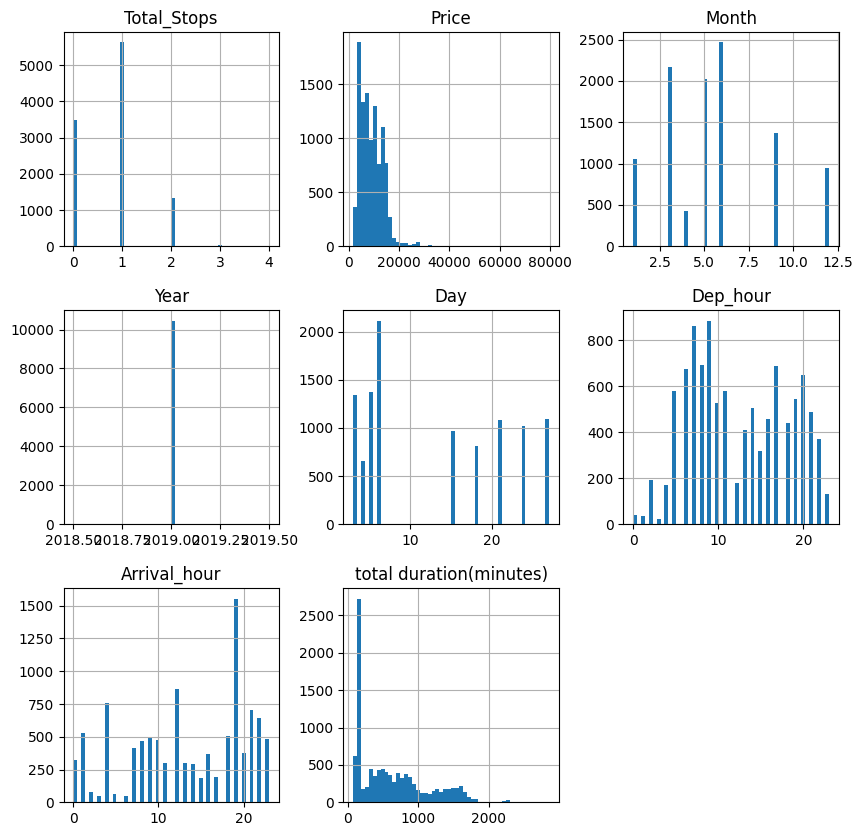

In [ ]:
data.hist(bins=50,figsize=(10,10))
plt.show()

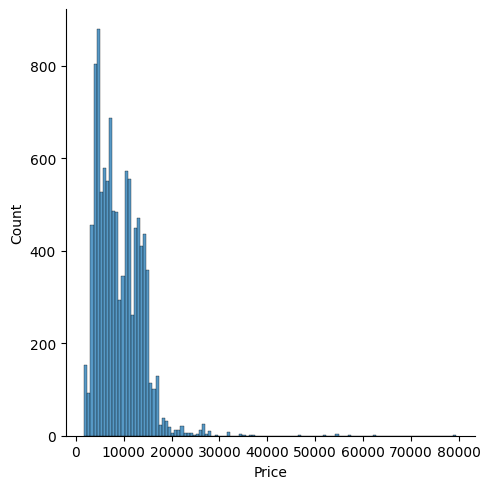

In [ ]:
sns.displot(data['Price'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

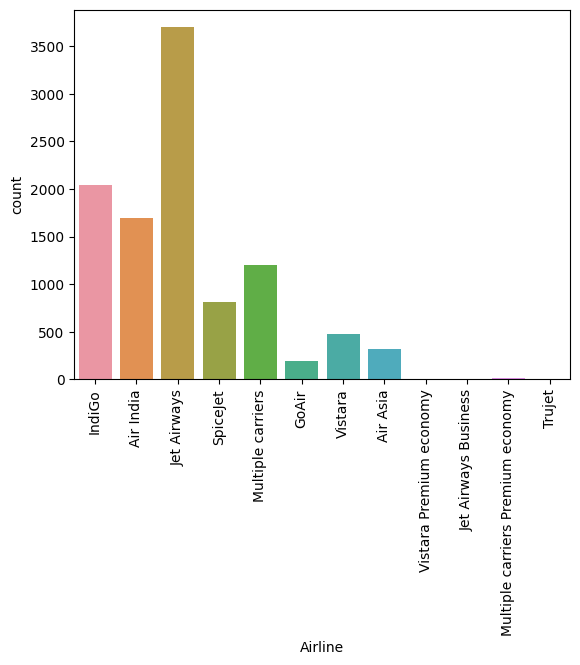

In [ ]:
sns.countplot(x="Airline",data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

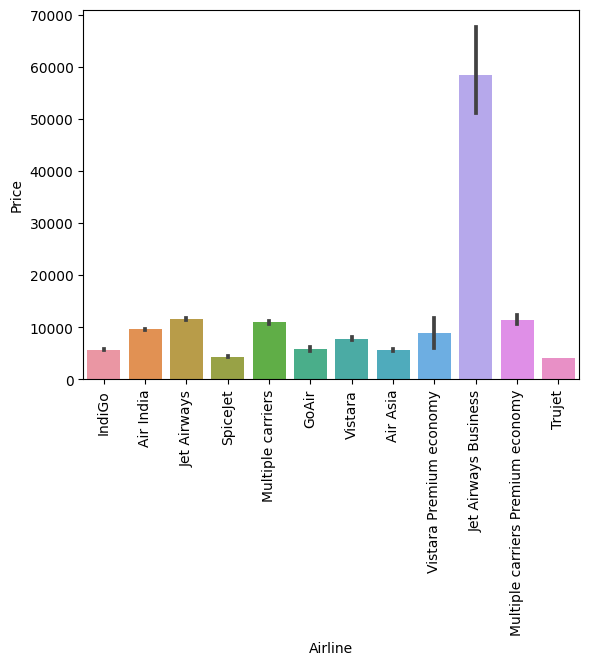

In [ ]:
sns.barplot(x="Airline",y="Price",data=data)
plt.xticks(rotation=90)

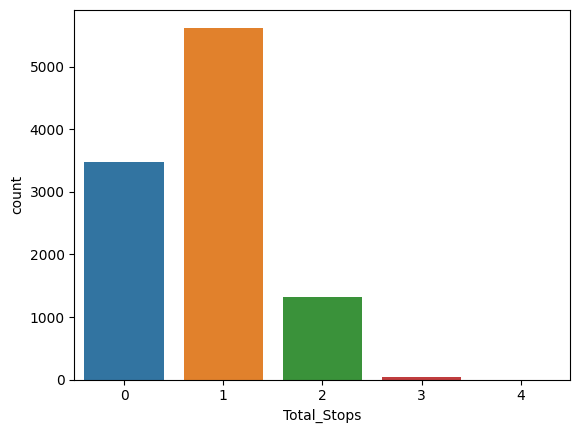

In [ ]:
sns.countplot(x="Total_Stops",data=data);

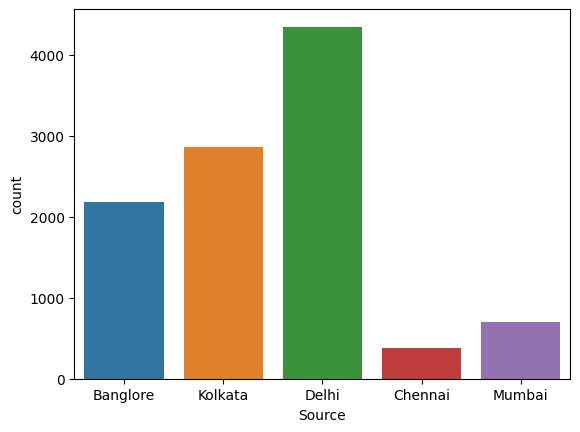

In [ ]:
sns.countplot(x="Source",data=data);

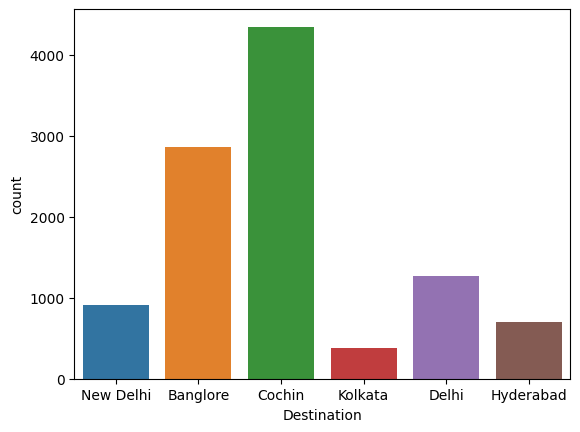

In [ ]:
sns.countplot(x="Destination",data=data);

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

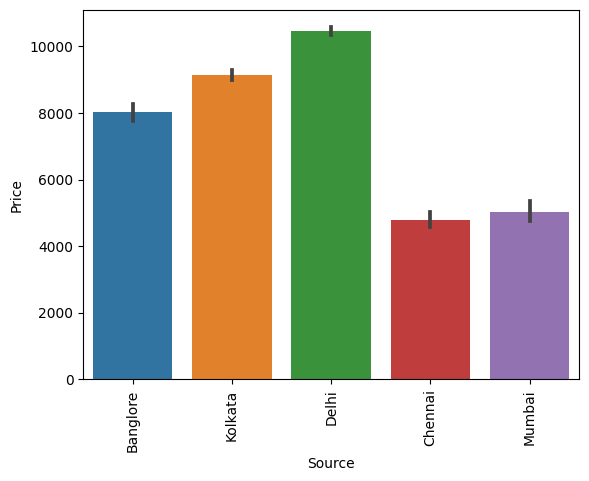

In [ ]:
sns.barplot(x="Source",y="Price",data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

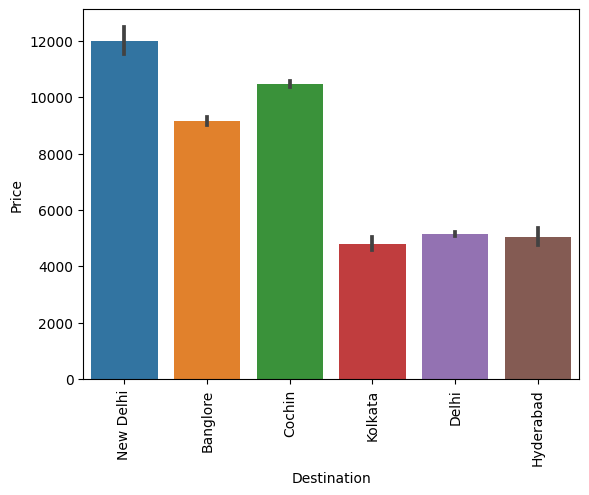

In [ ]:
sns.barplot(x="Destination",y="Price",data=data)
plt.xticks(rotation=90)

In [ ]:
object_types = ["Airline","Source","Destination"]
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder().fit(data[object_types])
data[object_types] =  oe.transform(data[object_types])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Airline                  10462 non-null  float64
 1   Source                   10462 non-null  float64
 2   Destination              10462 non-null  float64
 3   Total_Stops              10462 non-null  int64  
 4   Price                    10462 non-null  int64  
 5   Month                    10462 non-null  int64  
 6   Year                     10462 non-null  int64  
 7   Day                      10462 non-null  int64  
 8   Dep_hour                 10462 non-null  int64  
 9   Arrival_hour             10462 non-null  int64  
 10  total duration(minutes)  10462 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 980.8 KB


# Model Building

In [ ]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =0)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([ 9733.54672922,  5251.97360177, 10109.56109776, ...,
       10483.21453477, 10843.55922973, 10397.30921804])

In [ ]:
print("MSE : ",mean_squared_error(y_pred,y_test))
print("MAE : ",mean_absolute_error(y_pred,y_test))
print("R Score :",r2_score(y_pred,y_test))

MSE :  12457271.125415374
MAE :  2493.0394260239477
R Score : -0.2901197608402242


**SVM**

In [ ]:
svm = SVR(kernel = "linear")
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)

In [ ]:
svm_pred

array([9267.37885584, 5161.58663182, 9728.9272425 , ..., 8981.7704624 ,
       9342.92743154, 7065.77978201])

In [ ]:
print("MSE : ",mean_squared_error(svm_pred,y_test))
print("MAE : ",mean_absolute_error(svm_pred,y_test))
print("R Score :",r2_score(svm_pred,y_test))

MSE :  15693015.865590107
MAE :  2586.079909772091
R Score : -1.1404843331051078


**Decision Tree**

In [ ]:
decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)
decision_tree_reg.fit(X_train, y_train)
dt_pred = decision_tree_reg.predict(X_test)

In [ ]:
dt_pred

array([ 9728.4940239 ,  4705.08052306, 11950.13745211, ...,
       11950.13745211, 11950.13745211, 11950.13745211])

In [ ]:
print("MSE : ",mean_squared_error(dt_pred,y_test))
print("MAE : ",mean_absolute_error(dt_pred,y_test))
print("R Score :",r2_score(dt_pred,y_test))

MSE :  8520673.925224848
MAE :  1785.869918638516
R Score : 0.49419157911467393


**Random Forest**

In [ ]:
random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)
random_forest_reg.fit(X_train, y_train)
rf_pred = random_forest_reg.predict(X_test)

In [ ]:
rf_pred

array([ 9518.48226067,  5079.4400443 , 12073.62490115, ...,
       12073.62490115, 11377.19120229, 11696.67570001])

In [ ]:
print("MSE : ",mean_squared_error(rf_pred,y_test))
print("MAE : ",mean_absolute_error(rf_pred,y_test))
print("R Score :",r2_score(rf_pred,y_test))

MSE :  6877747.8773718355
MAE :  1729.3764408146674
R Score : 0.5530297784115021


**Lasso**

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(0.1)
lasso.fit(X_train, y_train)
l_pred= lasso.predict(X_test)

In [ ]:
l_pred

array([ 9733.51681213,  5252.03074034, 10109.65699379, ...,
       10483.15065047, 10843.53425788, 10396.8119754 ])

In [ ]:
print("MSE : ",mean_squared_error(l_pred,y_test))
print("MAE : ",mean_absolute_error(l_pred,y_test))
print("R Score :",r2_score(l_pred,y_test))

MSE :  12457296.664053567
MAE :  2493.0174607618983
R Score : -0.29027347583657903


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
r_pred= ridge.predict(X_test)

In [ ]:
print("MSE : ",mean_squared_error(r_pred,y_test))
print("MAE : ",mean_absolute_error(r_pred,y_test))
print("R Score :",r2_score(r_pred,y_test))

MSE :  12457427.142737346
MAE :  2493.000916126283
R Score : -0.29071327379647927


**Polynomial Features**

In [ ]:
polynomial_features = PolynomialFeatures(degree=3)
x_train_poly = polynomial_features.fit_transform(X_train)
x_test_poly = polynomial_features.fit_transform(X_test)
polynomial_reg = LinearRegression(fit_intercept=False)
polynomial_reg.fit(x_train_poly, y_train)
pf_pred = polynomial_reg.predict(x_test_poly)

In [ ]:
pf_pred

array([ 8553.86043727,  5440.31971155, 11706.36393088, ...,
       11876.7188581 , 12409.45658203, 11655.13903303])

In [ ]:
print("MSE : ",mean_squared_error(pf_pred,y_test))
print("MAE : ",mean_absolute_error(pf_pred,y_test))
print("R Score :",r2_score(pf_pred,y_test))

MSE :  7846056.148594939
MAE :  1971.0542125293046
R Score : 0.46071330299582536


**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gradboost = GradientBoostingRegressor()
gradboost.fit(X_train, y_train)
gb_pred = gradboost.predict(X_test)

In [ ]:
gb_pred

array([ 8955.21130209,  4739.27018629, 11481.50076945, ...,
       11885.94031171, 10401.04929034, 12185.63663693])

In [ ]:
print("MSE : ",mean_squared_error(gb_pred,y_test))
print("MAE : ",mean_absolute_error(gb_pred,y_test))
print("R Score :",r2_score(gb_pred,y_test))

MSE :  5218632.557390235
MAE :  1513.1857867015106
R Score : 0.6497744202550638


**XG Boost**

In [ ]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
xgb_r.fit(X_train, y_train)
xg_pred = xgb_r.predict(X_test)

In [ ]:
xg_pred

array([ 8522.575 ,  4961.8804, 11490.651 , ..., 11720.57  ,  9863.248 ,
       11416.786 ], dtype=float32)

In [ ]:
print("MSE : ",mean_squared_error(xg_pred,y_test))
print("MAE : ",mean_absolute_error(xg_pred,y_test))
print("R Score :",r2_score(xg_pred,y_test))

MSE :  4944066.038904705
MAE :  1477.5129812124865
R Score : 0.6744104948704426


The XGBoost regression model is best fit for the above data

# Testing dataset

In [ ]:
data_test=pd.read_csv("/content/drive/MyDrive/Test_set.csv")

In [ ]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [ ]:
data_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [ ]:
data_test['Date_of_Journey'] = pd.to_datetime(data_test['Date_of_Journey'])
data_test['Date_of_Journey']
data_test['Month_test']=data_test['Date_of_Journey'].dt.month
data_test['Year_test']=data_test['Date_of_Journey'].dt.year
data_test['Day_test']=data_test['Date_of_Journey'].dt.day

In [ ]:
data_test.drop(["Route", "Additional_Info","Date_of_Journey"], axis = 1, inplace = True)

In [ ]:
data_test['Dep_Time']=pd.to_datetime(data_test['Dep_Time'])
data_test['Arrival_Time']=pd.to_datetime(data_test['Arrival_Time'])

In [ ]:
data_test.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [ ]:
data_test.head()

,Airline,Source,Destination,Duration,Total_Stops,Month_test,Year_test,Day_test
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,6,2019,6
1,IndiGo,Kolkata,Banglore,4h,1 stop,12,2019,5
2,Jet Airways,Delhi,Cochin,23h 45m,1 stop,5,2019,21
3,Multiple carriers,Delhi,Cochin,13h,1 stop,5,2019,21
4,Air Asia,Banglore,Delhi,2h 50m,non-stop,6,2019,24


In [ ]:
data_test['dur_hr_test']=data_test['Duration'].str.split('h').str[0]

In [ ]:
data_test['dur_hr_test'].unique()

array(['10', '4', '23', '13', '2', '18', '15', '5', '6', '28', '9', '17',
       '12', '14', '11', '25', '19', '7', '3', '1', '27', '26', '8', '21',
       '16', '22', '33', '24', '38', '20', '35', '31', '34', '29', '30',
       '37', '36', '39', '32', '40', '5m'], dtype=object)

In [ ]:
data_test.drop(data_test[data_test['dur_hr_test'] == '5m'].index,inplace=True)

In [ ]:
data_test['dur_min_test']=data_test['Duration'].str.split(' ').str[1]

In [ ]:
data_test['dur_min_test']=data_test['dur_min_test'].str.replace('m','')

In [ ]:
data_test['dur_min_test']=data_test['dur_min_test'].fillna(0).astype(int)
data_test['dur_hr_test']=data_test['dur_hr_test'].astype(int)
data_test['total duration(minutes)_test']=data_test['dur_hr_test']*60+data_test['dur_min_test']

In [ ]:
data_test.drop(['Duration','dur_hr_test','dur_min_test'],axis=1,inplace=True)

In [ ]:
data_test['Total_Stops'] = data_test["Total_Stops"].str.replace('non-stop','0')
data_test['Total_Stops'] = data_test["Total_Stops"].str.replace('stops','')
data_test['Total_Stops'] = data_test["Total_Stops"].str.replace('stop','')
data_test['Total_Stops'] = data_test["Total_Stops"].str.replace(' ','')
data_test['Total_Stops'] = data_test["Total_Stops"].astype(int)

In [ ]:
data_test.head()

,Airline,Source,Destination,Total_Stops,Month_test,Year_test,Day_test,total duration(minutes)_test
0,Jet Airways,Delhi,Cochin,1,6,2019,6,655
1,IndiGo,Kolkata,Banglore,1,12,2019,5,240
2,Jet Airways,Delhi,Cochin,1,5,2019,21,1425
3,Multiple carriers,Delhi,Cochin,1,5,2019,21,780
4,Air Asia,Banglore,Delhi,0,6,2019,24,170


In [ ]:
object_types = ["Airline","Source","Destination"]
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder().fit(data_test[object_types])
data_test[object_types] =  oe.transform(data_test[object_types])

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Airline                       2670 non-null   float64
 1   Source                        2670 non-null   float64
 2   Destination                   2670 non-null   float64
 3   Total_Stops                   2670 non-null   int64  
 4   Month_test                    2670 non-null   int64  
 5   Year_test                     2670 non-null   int64  
 6   Day_test                      2670 non-null   int64  
 7   total duration(minutes)_test  2670 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 187.7 KB


In [ ]:
from sklearn.model_selection import cross_val_score
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
scores = cross_val_score(xgb_r, x, y, cv=5)
print(np.mean(scores))

0.7732419506409076


In [ ]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
xgb_r.fit(X_train, y_train)
xg_pred = xgb_r.predict(X_test)

In [ ]:
xgb_r.fit(X_train, y_train)
price_pred=xgb_r.predict(X_test)
print("Price Predicted:")
print(price_pred)

Price Predicted:
[ 8522.575   4961.8804 11490.651  ... 11720.57    9863.248  11416.786 ]


In [ ]:
data_test = data_test.iloc[:2093]
data_test['price_pred'] = price_pred

In [ ]:
data_test

,Airline,Source,Destination,Total_Stops,Month_test,Year_test,Day_test,total duration(minutes)_test,price_pred
0,4.0,2.0,1.0,1,6,2019,6,655,8522.575195
1,3.0,3.0,0.0,1,12,2019,5,240,4961.880371
2,4.0,2.0,1.0,1,5,2019,21,1425,11490.651367
3,6.0,2.0,1.0,1,5,2019,21,780,9599.358398
4,0.0,0.0,2.0,0,6,2019,24,170,6993.105957
...,...,...,...,...,...,...,...,...,...
2088,4.0,3.0,0.0,1,6,2019,6,910,11349.537109
2089,8.0,3.0,0.0,0,6,2019,5,150,6452.851562
2090,1.0,3.0,0.0,2,12,2019,6,1165,11720.570312
2091,2.0,2.0,1.0,1,4,2019,21,365,9863.248047
